In [2]:
# OS and math libraries
import os
import numpy as np
import pandas as pd

In [3]:
# Image reading libraries
from PIL import Image
from skimage.io import imread
from skimage.transform import resize

In [4]:
# Pre-processing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
# Analysis Libraries
from sklearn import metrics

In [7]:
# Dataset
input_dir = 'Cats_and_Dogs_Dataset'

# Pre-Processing for ML Model

### Converting Images into Arrays (Image Data)

In [8]:
# Categrizing the images
categories = ['cats', 'dogs']

for category in categories:
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)

Cats_and_Dogs_Dataset/cats/cat.4369.jpg
Cats_and_Dogs_Dataset/cats/cat.4355.jpg
Cats_and_Dogs_Dataset/cats/cat.4433.jpg
Cats_and_Dogs_Dataset/cats/cat.4427.jpg
Cats_and_Dogs_Dataset/cats/cat.4341.jpg
Cats_and_Dogs_Dataset/cats/cat.4396.jpg
Cats_and_Dogs_Dataset/cats/cat.4382.jpg
Cats_and_Dogs_Dataset/cats/cat.4619.jpg
Cats_and_Dogs_Dataset/cats/cat.4631.jpg
Cats_and_Dogs_Dataset/cats/cat.4157.jpg
Cats_and_Dogs_Dataset/cats/cat.4143.jpg
Cats_and_Dogs_Dataset/cats/cat.4625.jpg
Cats_and_Dogs_Dataset/cats/cat.4816.jpg
Cats_and_Dogs_Dataset/cats/cat.4802.jpg
Cats_and_Dogs_Dataset/cats/cat.4194.jpg
Cats_and_Dogs_Dataset/cats/cat.4180.jpg
Cats_and_Dogs_Dataset/cats/cat.4779.jpg
Cats_and_Dogs_Dataset/cats/cat.4745.jpg
Cats_and_Dogs_Dataset/cats/cat.4023.jpg
Cats_and_Dogs_Dataset/cats/cat.4037.jpg
Cats_and_Dogs_Dataset/cats/cat.4751.jpg
Cats_and_Dogs_Dataset/cats/cat.4989.jpg
Cats_and_Dogs_Dataset/cats/cat.4962.jpg
Cats_and_Dogs_Dataset/cats/cat.4976.jpg
Cats_and_Dogs_Dataset/cats/cat.4786.jpg


To display an image we need a path of each image. Here we are using two functions to handle path.

os.listdir - print a list of names of all the files present in the specified path.

os.path.join - return a combined path by merging arguments.

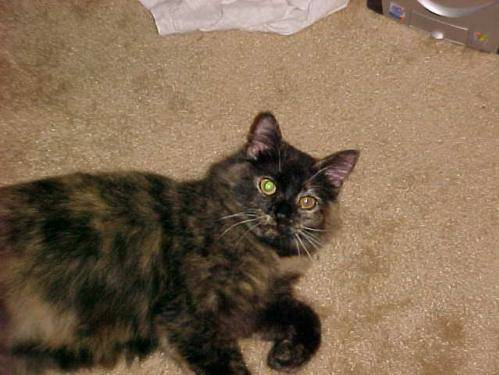

In [9]:
# Testing image reading
Image.open('Cats_and_Dogs_Dataset/cats/cat.4004.jpg')

In [10]:
# Initialting empty lists
labels =[]   # Labels for all imags
data = []   # Image data for all images

In [11]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)

In [12]:
labels = np.asarray(labels)
data = np.asarray(data)

### Scaling and Splitting data for Training and Testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [14]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression

In [15]:
# Fitting into LR Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_lr

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,

# Decision Tree

In [17]:
# Fitting into DT Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,

# Random Forest Classifier

In [19]:
# Fitting into RFC Model
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [20]:
# Predictions
y_pred_rfc = rfc.predict(X_test)
y_pred_rfc

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

# Model Analysis

In [21]:
# LR Model
print(f'Accuracy score LR: {metrics.accuracy_score(y_test, y_pred_lr)}')

Accuracy score LR: 0.5610972568578554


In [22]:
# DT Model
print(f'Accuracy score DT: {metrics.accuracy_score(y_test, y_pred_dt)}')

Accuracy score DT: 0.5386533665835411


In [23]:
# RFC Model
print(f'Accuracy score RFC: {metrics.accuracy_score(y_test, y_pred_rfc)}')

Accuracy score RFC: 0.6109725685785536


# Hyperparameter Tuning for RFC

In [24]:
# Parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=RandomForestClassifier(), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           verbose=2, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  10.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  10.2s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy', verbose=2)

In [26]:
# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Best Accuracy: 0.63875


In [27]:
# Predictions - Using the best model
best_rfc = grid_search.best_estimator_
y_pred_best_rfc = best_rfc.predict(X_test)
y_pred_best_rfc

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [28]:
# Accuracy of the tuned model
print(f"Accuracy score Tuned RFC: {metrics.accuracy_score(y_test, y_pred_best_rfc)}")

Accuracy score Tuned RFC: 0.6134663341645885


Hyperparameter tuning performed on the Random Forest Classifier using GridSearchCV to optimize its parameters, resulting in improved accuracy. 

The notebook effectively showcases the end-to-end pipeline for building and fine-tuning machine learning models for image classification tasks.